# Importing libraries

In [2]:
import cv2
import matplotlib.pyplot as plt

Download the MobileNet-SSD v3 (weights and config) from this link https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API <br>
tutorial link - https://youtu.be/RFqvTmEFtOE

In [3]:
frozen_model = r"A:\CODING\Python\Projects\object-detection\ssd_mobilenet_v3_large_coco_2020_01_14\frozen_inference_graph.pb"
config_file = r"A:\CODING\Python\Projects\object-detection\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
model = cv2.dnn_DetectionModel(frozen_model, config_file)

Download the list of labels from here https://github.com/pjreddie/darknet/blob/master/data/coco.names

In [4]:
classLabels = []
file_path = r"A:\CODING\Python\Projects\object-detection\labels.txt"
with open(file_path,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(len(classLabels))
classLabels

80


['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

ssd mobilenet accepts images of 320,320 -- we can see here https://gist.github.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7

In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001D35829B8D0>

# Read image

In [7]:
img = cv2.imread(r"A:\CODING\Python\Projects\object-detection\sample_image.jpg")

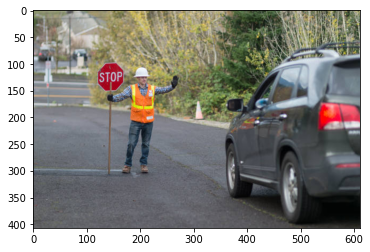

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
index, confidence, box = model.detect(img,confThreshold=0.5)

In [10]:
print(index)

[ 1 13  3  1]


In [11]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for class_index , conf, boxes in zip(index.flatten(), confidence.flatten(), box):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img,classLabels[class_index-1], (boxes[0]+10,boxes[1]+40), font, fontScale= font_scale, color=(0,255,0), thickness=3)
    print(classLabels[class_index-1])

person
parking meter
car
person


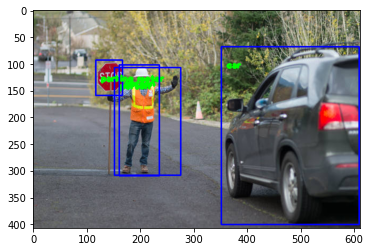

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Lets generalise this

In [13]:
def pass_photo(img):
    index, confidence, box = model.detect(img,confThreshold=0.5)
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    for class_index , conf, boxes in zip(index.flatten(), confidence.flatten(), box):
        cv2.rectangle(img, boxes,(255,0,0),2)
        cv2.putText(img,classLabels[class_index-1], (boxes[0]+10,boxes[1]+40), font, fontScale= font_scale, color=(0,255,0), thickness=3)
        print(classLabels[class_index-1])

In [14]:
img1 = cv2.imread(r"A:\CODING\Python\Projects\object-detection\1.jpg")
img2 = cv2.imread(r"A:\CODING\Python\Projects\object-detection\2.jpg")
img3 = cv2.imread(r"A:\CODING\Python\Projects\object-detection\3.png")

car
car
car
traffic light
car
car
car
car
traffic light
car
traffic light
traffic light
bus
traffic light
car
car
traffic light


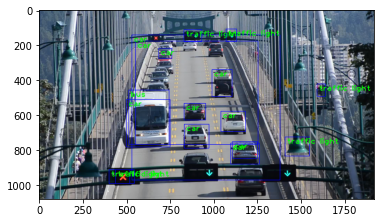

In [15]:
pass_photo(img1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

person
car
person
car
car
person
person
car
car
person
car
bicycle
person
car
person


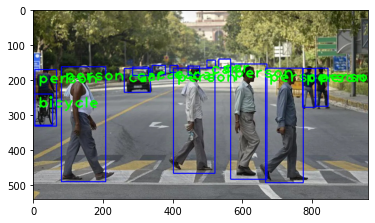

In [16]:
pass_photo(img2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

toilet
tvmonitor
tvmonitor
tvmonitor
toilet
tvmonitor
tvmonitor


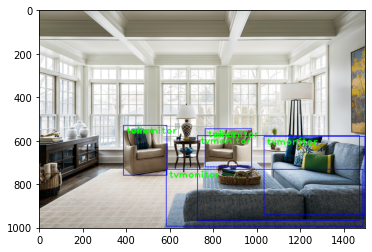

In [17]:
pass_photo(img3)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))

## Lets test on Webcam

In [18]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    pass_photo(frame)
    cv2.imshow("window", frame)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
cv2.destroyAllWinddows()

person
person


AttributeError: module 'cv2' has no attribute 'destroyAllWinddows'